In [34]:
import pandas as pd
import numpy as np


In [35]:
data=pd.read_csv('metaverse_transactions_dataset.csv')
data

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


In [36]:
data['date']=pd.to_datetime(data['timestamp'])
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day

data['hour']=data['date'].dt.hour
data['minute']=data['date'].dt.minute
data['second']=data['date'].dt.second


In [37]:
# to keep the original data intact we will create a copy
df=data.copy()
df

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,...,age_group,risk_score,anomaly,date,year,month,day,hour,minute,second
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,...,established,18.7500,low_risk,2022-04-11 12:47:27,2022,4,11,12,47,27
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,...,established,25.0000,low_risk,2022-06-14 19:12:46,2022,6,14,19,12,46
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,...,established,31.2500,low_risk,2022-01-18 16:26:59,2022,1,18,16,26,59
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,...,veteran,36.7500,low_risk,2022-06-15 09:20:04,2022,6,15,9,20,4
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,...,veteran,62.5000,moderate_risk,2022-02-18 14:35:30,2022,2,18,14,35,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,...,new,26.2500,low_risk,2022-02-13 12:52:27,2022,2,13,12,52,27
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,...,established,26.2500,low_risk,2022-02-16 16:15:29,2022,2,16,16,15,29
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,...,new,36.7500,low_risk,2022-08-04 16:06:42,2022,8,4,16,6,42
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,...,established,35.4375,low_risk,2022-02-26 04:06:08,2022,2,26,4,6,8


In [38]:
df.drop(columns=['date','timestamp'],inplace=True,axis=1)
df.drop(columns=['hour_of_day'],inplace=True,axis=1)

In [39]:
df

,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,year,month,day,hour,minute,second
0,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk,2022,4,11,12,47,27
1,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk,2022,6,14,19,12,46
2,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk,2022,1,18,16,26,59
3,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk,2022,6,15,9,20,4
4,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk,2022,2,18,14,35,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk,2022,2,13,12,52,27
78596,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk,2022,2,16,16,15,29
78597,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk,2022,8,4,16,6,42
78598,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk,2022,2,26,4,6,8


In [40]:
df['purchase_pattern'].value_counts()

purchase_pattern
high_value    26422
random        26145
focused       26033
Name: count, dtype: int64

In [41]:
df['age_group'].value_counts()

age_group
veteran        26422
new            26145
established    26033
Name: count, dtype: int64

In [42]:
df['anomaly'].value_counts()

anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

In [43]:
df['location_region'].unique()

array(['Europe', 'South America', 'Asia', 'Africa', 'North America'],
      dtype=object)

In [44]:
df['transaction_type'].unique()

array(['transfer', 'purchase', 'sale', 'phishing', 'scam'], dtype=object)

Exploratory data analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sending_address    78600 non-null  object 
 1   receiving_address  78600 non-null  object 
 2   amount             78600 non-null  float64
 3   transaction_type   78600 non-null  object 
 4   location_region    78600 non-null  object 
 5   ip_prefix          78600 non-null  float64
 6   login_frequency    78600 non-null  int64  
 7   session_duration   78600 non-null  int64  
 8   purchase_pattern   78600 non-null  object 
 9   age_group          78600 non-null  object 
 10  risk_score         78600 non-null  float64
 11  anomaly            78600 non-null  object 
 12  year               78600 non-null  int32  
 13  month              78600 non-null  int32  
 14  day                78600 non-null  int32  
 15  hour               78600 non-null  int32  
 16  minute             786

In [46]:
df.describe()

,amount,ip_prefix,login_frequency,session_duration,risk_score,year,month,day,hour,minute,second
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.0,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,502.574903,147.644430,4.178702,69.684606,44.956722,2022.0,6.530153,15.747303,11.532634,29.438435,29.463384
std,245.898146,69.388143,2.366038,40.524476,21.775365,0.0,3.453638,8.820144,6.935897,17.299870,17.304440
min,0.010000,10.000000,1.000000,20.000000,15.000000,2022.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,331.319966,172.000000,2.000000,35.000000,26.250000,2022.0,4.000000,8.000000,6.000000,15.000000,14.000000
50%,500.029500,172.160000,4.000000,60.000000,40.000000,2022.0,7.000000,16.000000,12.000000,29.000000,29.000000
75%,669.528311,192.000000,6.000000,100.000000,52.500000,2022.0,10.000000,23.000000,18.000000,44.000000,44.000000
max,1557.150905,192.168000,8.000000,159.000000,100.000000,2022.0,12.000000,31.000000,23.000000,59.000000,59.000000


In [47]:
df['receiving_address'].value_counts().unique()

array([232, 203, 174, 145, 117, 116,  88,  87,  59,  58,  30,  29])

In [48]:
df['sending_address'].value_counts().unique()


array([232, 204, 203, 174, 146, 145, 117, 116,  88,  87,  59,  58,  30,
        29])

In [49]:
df['receiving_address'].isna().sum()
df['sending_address'].isna().sum()

np.int64(0)

In [50]:
df.duplicated().value_counts()

False    78600
Name: count, dtype: int64

In [51]:
df.columns

Index(['sending_address', 'receiving_address', 'amount', 'transaction_type',
       'location_region', 'ip_prefix', 'login_frequency', 'session_duration',
       'purchase_pattern', 'age_group', 'risk_score', 'anomaly', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [52]:
# total transaction per region
d1=dict()
keys=list(set(df['location_region']))
df.groupby('location_region')['amount'].sum()

location_region
Africa           7.784919e+06
Asia             7.937783e+06
Europe           7.938950e+06
North America    7.962784e+06
South America    7.877952e+06
Name: amount, dtype: float64

<Axes: ylabel='session_duration'>

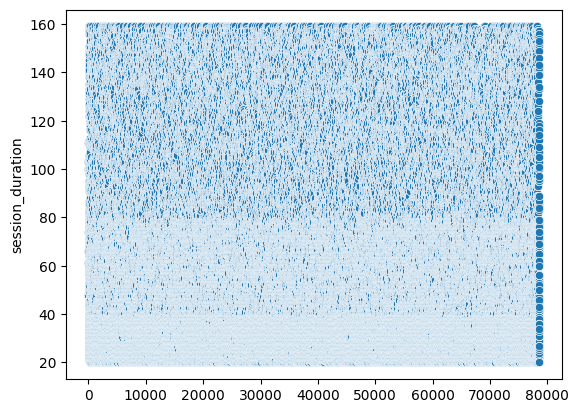

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df['session_duration'])


this depicts a uniform distribution


<Axes: xlabel='count', ylabel='Density'>

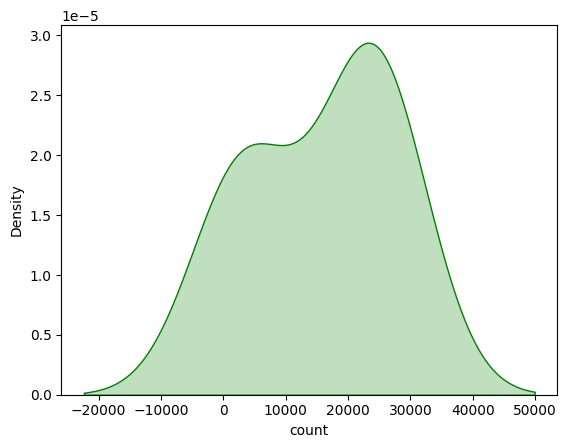

In [54]:
sns.kdeplot(df['transaction_type'].value_counts(),color='green',fill=True)

In [55]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['anomaly'])
y=df['anomaly']

x_features,y_features,x_label,y_label=train_test_split(X,y,test_size=0.2,random_state=42)



In [56]:
x_features

,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,year,month,day,hour,minute,second
31133,0x6193da4079f1a30f8e86ae4d63ff8144c4722d79,0x6b7b931603056cb8aed7477068c071591a5ee3e9,575.541393,sale,Europe,172.160,7,82,high_value,veteran,52.5000,2022,10,7,11,19,52
43844,0x5c6e4c0c1af75af7bd3bdbeb51980d3205cb182c,0x277b36ba56a9b705d63de9d7da8b44bf0fe43a65,1083.470998,transfer,Africa,192.000,7,150,high_value,veteran,59.0625,2022,4,26,1,57,7
10032,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,0x79a4fdc85b16aa0a602c6ba9737204c7549c40f7,571.455939,transfer,South America,172.000,1,26,random,new,26.2500,2022,5,5,14,27,10
69576,0x160ea7e00bd49c9ae93e0f74213be958d87841fb,0xda6f58d5369d83a6d4307e43b822d1b01cda0a82,46.931993,sale,Europe,192.168,6,105,high_value,veteran,50.0000,2022,7,26,11,58,38
13694,0x651ed6aa3fcf9726567183880190c84b52ffde19,0x8da4fc8aefcaafb448d3cc811de195f91785d90e,505.176300,sale,South America,192.168,7,127,high_value,veteran,70.8750,2022,8,17,5,38,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0x7fdd1c0ca5c9fa336adada7efebad12a5f067704,0x1f417f20375bd5610bd91bdef059c71fd38185c1,572.410071,sale,Africa,192.168,7,141,high_value,veteran,52.5000,2022,4,29,8,18,35
54886,0x13d92b018a9df83afae540116c72f665e89786e8,0xec6d746b6e10d5a78997ecbfe7612eda26adc04b,243.959250,purchase,Africa,10.000,2,27,random,new,47.2500,2022,9,7,4,15,22
76820,0x0bdc9e8dd3cf34b207a2f547f45a23e5808d84fb,0x1e9373af5f508c95b8910a70c5bbe5db25be5f83,527.297158,transfer,North America,172.160,1,25,random,new,26.2500,2022,5,11,16,5,47
860,0xb7f0592b292adbc77cb6d14e7dc6eee2206ce4a0,0x340a612e7bcc42ec1ec46f9d88eb795973e532f0,294.100905,scam,Europe,10.000,1,27,random,new,90.0000,2022,6,26,7,11,19


In [57]:
# x_features
# y_features
x_label

31133         low_risk
43844         low_risk
10032         low_risk
69576         low_risk
13694    moderate_risk
             ...      
6265          low_risk
54886         low_risk
76820         low_risk
860          high_risk
15795    moderate_risk
Name: anomaly, Length: 62880, dtype: object

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ct=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False),['transaction_type','age_group','location_region','purchase_pattern'])
],remainder='passthrough')



In [59]:
ct.fit(x_features)


,transformers,"[('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [60]:
X_train=ct.transform(x_features)
y_test=ct.transform(y_features)

In [61]:
y_test

array([[0.0, 0.0, 1.0, ..., 0, 7, 12],
       [0.0, 0.0, 0.0, ..., 8, 59, 8],
       [0.0, 0.0, 0.0, ..., 7, 58, 19],
       ...,
       [0.0, 0.0, 0.0, ..., 7, 55, 4],
       [0.0, 0.0, 1.0, ..., 5, 23, 57],
       [0.0, 0.0, 1.0, ..., 7, 6, 44]], shape=(15720, 29), dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X_train_label=le.fit_transform(x_label)
y_test_label=le.transform(y_label)

In [63]:
df_train=pd.DataFrame(X_train,columns=ct.get_feature_names_out())

df_train.rename(columns={
    'ohe__transaction_type_phishing':'tran_phishing',
    'ohe__transaction_type_purchase':'tran_purchase',
    'ohe__transaction_type_sale':'tran_sale',
    'ohe__transaction_type_scam':'tran_scam',
    'ohe__transaction_type_transfer':'tran_transfer',
    'ohe__age_group_established':'age_established',
    'ohe__age_group_new':'age_new',
    'ohe__age_group_veteran':'age_veteran',
    'ohe__location_region_Africa':'Africa',
    'ohe__location_region_Asia':'Asia',
    'ohe__location_region_Europe':'Europe',
    'ohe__location_region_North America':'North America',
    'ohe__location_region_South America':'South America',
    'remainder__ip_prefix':'ip_prefix',
    'remainder__amount':'amount',
    'remainder__login_frequency':'login_freq',
    'remainder__session_duration':'session_duration',
    'remainder__risk_score':'risk_score',
    'remainder_year':'year',
    'remainder__month':'month',
    'remainder__day':'day',
    'remainder__hour':'hour',
    'remainder__minute':'minute',
    'remainder__second':'second'

},inplace=True)


In [64]:
df_test=pd.DataFrame(y_test,columns=[df_train.columns])
df_test

,tran_phishing,tran_purchase,tran_sale,tran_scam,tran_transfer,age_established,age_new,age_veteran,Africa,Asia,...,ip_prefix,login_freq,session_duration,risk_score,remainder__year,month,day,hour,minute,second
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,192.0,2,28,67.5,2022,1,22,0,7,12
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,10.0,2,25,25.0,2022,1,10,8,59,8
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,192.168,1,21,90.0,2022,7,21,7,58,19
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,192.0,2,34,50.0,2022,4,1,9,1,27
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,10.0,5,60,35.4375,2022,7,16,5,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15715,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,10.0,8,137,52.5,2022,1,30,16,11,4
15716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,192.168,1,35,40.0,2022,1,26,19,57,6
15717,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,172.0,1,33,26.25,2022,3,26,7,55,4
15718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,172.16,7,106,70.875,2022,5,23,5,23,57


In [65]:
df_test.columns

MultiIndex([(                   'tran_phishing',),
            (                   'tran_purchase',),
            (                       'tran_sale',),
            (                       'tran_scam',),
            (                   'tran_transfer',),
            (                 'age_established',),
            (                         'age_new',),
            (                     'age_veteran',),
            (                          'Africa',),
            (                            'Asia',),
            (                          'Europe',),
            (                   'North America',),
            (                   'South America',),
            (   'ohe__purchase_pattern_focused',),
            ('ohe__purchase_pattern_high_value',),
            (    'ohe__purchase_pattern_random',),
            (      'remainder__sending_address',),
            (    'remainder__receiving_address',),
            (                          'amount',),
            (                  

In [66]:
df_train.rename(columns={'remainder__year':'year'},inplace=True)

In [67]:
df_train.columns

Index(['tran_phishing', 'tran_purchase', 'tran_sale', 'tran_scam',
       'tran_transfer', 'age_established', 'age_new', 'age_veteran', 'Africa',
       'Asia', 'Europe', 'North America', 'South America',
       'ohe__purchase_pattern_focused', 'ohe__purchase_pattern_high_value',
       'ohe__purchase_pattern_random', 'remainder__sending_address',
       'remainder__receiving_address', 'amount', 'ip_prefix', 'login_freq',
       'session_duration', 'risk_score', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [68]:
df_train.drop(columns=['remainder__sending_address','remainder__receiving_address'],inplace=True,axis=1)

In [69]:
df_train.rename(columns={
    'ohe__purchase_pattern_focused':'pp_focused',
    'ohe__purchase_pattern_high_value':'pp_highvalue',
    'ohe__purchase_pattern_random':'pp_random'
},inplace=True)


In [70]:
df_train_label=pd.DataFrame(X_train_label,columns=['anomaly'])
df_train_label


,anomaly
0,1
1,1
2,1
3,1
4,2
...,...
62875,1
62876,1
62877,1
62878,0


In [71]:
df_train.columns

Index(['tran_phishing', 'tran_purchase', 'tran_sale', 'tran_scam',
       'tran_transfer', 'age_established', 'age_new', 'age_veteran', 'Africa',
       'Asia', 'Europe', 'North America', 'South America', 'pp_focused',
       'pp_highvalue', 'pp_random', 'amount', 'ip_prefix', 'login_freq',
       'session_duration', 'risk_score', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')

In [72]:
df_train.groupby('remainder__sending_address')['amount'].sum()

KeyError: 'remainder__sending_address'

In [ ]:
df_train.groupby('remainder__receiving_address')['amount'].sum()


remainder__receiving_address
0x00070ac7479dedee29d468ff8f07afa40564ae4a    33439.732557
0x00262fa3b21847775e2db42965d0192e8dfe5bdc    26020.456888
0x002bcd751410a69b3bce463890abb2fcab81a755    37172.510714
0x00318c7963a45ceb6b3101e1794ad42137da8f3f      12268.5965
0x003ebce509d14e6252dc14c35beb43d2dc52f35c    45513.928174
                                                  ...     
0xfed686624c08633d15a980522d29b77319a1a65f    37007.631918
0xff209e4a1ce114ec3e245cf48fa19eeaff9cec31    18854.474739
0xffa670245089044b1e355508a7843692a25a5e52    24081.092551
0xffbdcd1c606b88a37e953dd81cc8d20b11a9d77a    32700.074995
0xfff61889339b01858cc0b3034ecc59aa7f47db25    72605.116407
Name: amount, Length: 1166, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


rf1=RandomForestClassifier(n_estimators=100,random_state=42)
model=rf1.fit(df_train.drop(columns=['remainder__sending_address','remainder__receiving_address']),df_train_label)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
predictions=model.predict(df_test.drop(columns=['remainder__sending_address','remainder__receiving_address']))

C:\Users\user\AppData\Local\Temp\ipykernel_13572\1156282986.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  predictions=model.predict(df_test.drop(columns=['remainder__sending_address','remainder__receiving_address']))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test_label,predictions)
accuracy

1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier(random_state=42)
model=dt.fit(df_train.drop(columns=['remainder__sending_address','remainder__receiving_address']),df_train_label)


In [ ]:
predictions=model.predict(df_test.drop(columns=['remainder__sending_address','remainder__receiving_address']))

C:\Users\user\AppData\Local\Temp\ipykernel_13572\1156282986.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  predictions=model.predict(df_test.drop(columns=['remainder__sending_address','remainder__receiving_address']))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(accuracy_score(predictions,y_test_label))

1.0


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_features = df_train
y_train_labels = df_train_label.values.ravel()

X_test_features = df_test.drop(columns=['remainder__sending_address','remainder__receiving_address'])

# 1. Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_features, y_train_labels)
lr_pred = lr.predict(X_test_features)
print("Logistic Regression Accuracy:", accuracy_score(y_test_label, lr_pred))

# 2. SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_features, y_train_labels)
svm_pred = svm.predict(X_test_features)
print("SVM Accuracy:", accuracy_score(y_test_label, svm_pred))

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_features, y_train_labels)
knn_pred = knn.predict(X_test_features)
print("KNN Accuracy:", accuracy_score(y_test_label, knn_pred))

# 4. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb.fit(X_train_features, y_train_labels)
gb_pred = gb.predict(X_test_features)
print("Gradient Boosting Accuracy:", accuracy_score(y_test_label, gb_pred))

# 5. Naive Bayes
nb = GaussianNB()
nb.fit(X_train_features, y_train_labels)
nb_pred = nb.predict(X_test_features)
print("Naive Bayes Accuracy:", accuracy_score(y_test_label, nb_pred))

C:\Users\user\AppData\Local\Temp\ipykernel_16072\2150343628.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test_features = df_test.drop(columns=['remainder__sending_address','remainder__receiving_address'])
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Logistic Regression Accuracy: 1.0


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM Accuracy: 0.9396946564885497


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Accuracy: 0.9853053435114504


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting Accuracy: 1.0
Naive Bayes Accuracy: 0.8597328244274809


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [79]:
X_train_features.columns

Index(['tran_phishing', 'tran_purchase', 'tran_sale', 'tran_scam',
       'tran_transfer', 'age_established', 'age_new', 'age_veteran', 'Africa',
       'Asia', 'Europe', 'North America', 'South America', 'pp_focused',
       'pp_highvalue', 'pp_random', 'amount', 'ip_prefix', 'login_freq',
       'session_duration', 'risk_score', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')